<style>
  .hw-header {
    background: linear-gradient(45deg, #2C3E50, #4CA1AF);
    color: white;
    padding: 20px;
    border-radius: 10px;
    font-family: Arial, sans-serif;
    text-align: center;
    max-width: 800px;
    margin: 20px auto;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
  }
  .hw-title {
    font-size: 32px;
    margin-bottom: 10px;
    text-transform: uppercase;
    letter-spacing: 2px;
  }
  .hw-subtitle {
    font-size: 18px;
    font-weight: normal;
    margin-bottom: 15px;
    opacity: 0.8;
  }
  .hw-topics {
    font-size: 14px;
    display: flex;
    justify-content: center;
    flex-wrap: wrap;
    gap: 10px;
    margin-top: 15px;
  }
  .topic-tag {
    background-color: rgba(255,255,255,0.2);
    padding: 5px 10px;
    border-radius: 20px;
  }
</style>

<div class="hw-header">
  <h1 class="hw-title">Homework #6</h1>
  <h2 class="hw-subtitle">Navigating the Challenges of Missing Data</h2>
  <div class="hw-topics">
    <span class="topic-tag">MCAR, MAR, MNAR</span>
    <span class="topic-tag">Imputation Strategies</span>
    <span class="topic-tag">Unbalanced Datasets</span>
    <span class="topic-tag">Ethical Considerations</span>
  </div>
</div>

____

![missing](https://miro.medium.com/v2/resize:fit:1400/1*Lv3stjRTR86LUKli3druUA.png)

## <font color=#18453B> Problem #1 Balance and Missingness (10 pts) </font>

In this problem you will think through a situation in which the dataset has two problems at once: it is both unbalanced and has missing values.

### Scenario:
You are a data scientist at a financial institution developing a credit scoring model to predict loan defaults. You have a dataset of 10,000 loan applications with the following characteristics:

- 9,500 non-default cases (majority class)
- 500 default cases (minority class)
- Features include: age, income, credit history, employment status, and loan amount
- 20% of the income data is missing
- 10% of the credit history data is missing

### Tasks:

1. Missingness Analysis:
   - Propose a method to determine if the missing income and credit history data are MCAR, MAR, or MNAR.
   - How might the missingness mechanism affect the balance of your dataset? Explain your reasoning.

2. Data Preparation:
   - Suggest two different approaches to handle the missing data. Explain the pros and cons of each in the context of this imbalanced dataset.
   - Propose a method to address the class imbalance. How might your choice of method interact with your missing data approach?

3. Ethical Considerations:
   - Discuss potential biases that might arise from the combination of missing data and class imbalance in this credit scoring context.
   - Propose a strategy to monitor and mitigate these biases in a deployed model.


### Deliverables:
- Written responses to each task (1 paragraphs per sub-question)
- Python code snippets or pseudocode _where appropriate_

1. Missing Analysis:
   * To determine if there is missing income, we can plot the null values. To understand if missing data is completely at random, the distribution of the missing dataset is spread throughout the dataset. For plotting and seeing the missing data, one can use a library called ggplot,gg_miss_fct. there is a library called missingno.
   * Between the missing values and the variables, p-value > 0.05 suggests that the data is MCAR.Compare the distributions of observed values for different variables with and without missing data. If the distributions are very similar, the data may be MCAR.
   * If missingness is related to observed variables, it may indicate MAR., this can be observed using logistic regression. In visualization, if distributions differ systematically, it can indicate MAR
   * for MNAR, expert knowledge might be required to conclude, with visualization, if there are visible patterns between the variables and the missing data, it might indicate MNAR.
  
     The missing data can impact the balance because the sample size will reduce which will have an impact on the model training.
     * causes reduced statistical power
     * might cause incorrect predications due to reduced data
    
2. Data preparation:
   * Undersampling - Keeping all the minority classes and decreasing the size of the majority classes. It is good because it removes the instances from the majority class while resampling from the original dataset. It is not suited for a small dataset within 1000 rows because it might reduce the sampel size on which there cannot be any analysis performed with a small dataset.
   * Oversampling - Increasing the size of the minority classes to the size of the majority classes. It is used to improve anti-aliasing performance, to increase resolution and to reduce noise. it might not be used when there are a lot of missing values in the minority column because it may lead to overfitting, where the model becomes too specific to the training data and may not generalize well to new data.
  
3. Ethical considerations:
   * There could be overfitting of data because of the repetition of the data in oversampling. Sometimes the bias might not return correct results. Significant missing data will reduce the quality of the model training. The incorrect results cannot be applied in use cases which will have an impact in situations associated with health.
   * To mitigate such biases caused with missing data, different scenarios should be considered for different types of missing data. Randomly choosing imputing of data will not be the best way of handling missing data. There are different ways of imputation like strategy of mean, median and most frequest and we must check using different strategies as to which will be the most accurate strategy. Expert knowledge will be the most essential when it comes to choosing  the imputation method. 

<Axes: >

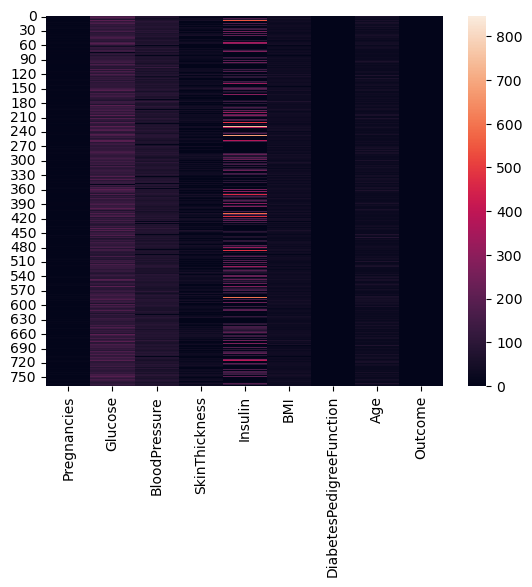

In [160]:
import pandas as pd
from statsmodels.imputation.mice import MICEData

# Load your dataset
data = pd.read_csv('diabetes.csv')

# Initialize MICEData with your dataset
mice_data = MICEData(data)

# To impute the missing data using MICE (Multiple Imputation by Chained Equations)
# You can inspect the dataset with imputations
sns.heatmap(mice_data.data)
#For MCAR, you expect the p-value to be large (> 0.05), meaning the missing data is completely random.

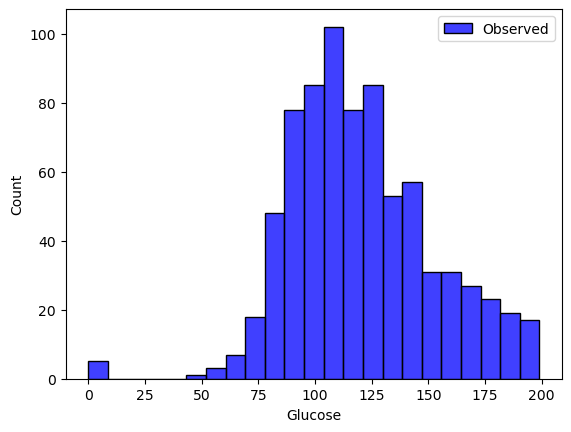

In [162]:
#mnar

# Hypothesis: Missing values in a column are related to the actual value itself
# (e.g., higher income people do not report their income)

# Create a mask for missing data
missing_mask = data['Glucose'].isnull()

# For example, you might try to impute missing values and check if the imputed values
# differ significantly from the rest of the dataset
from sklearn.impute import SimpleImputer

# Impute the missing values using a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(data[['Glucose']])

# Compare the distributions of imputed values vs. observed values
sns.histplot(imputed_values[missing_mask], color='red', label='Imputed (Missing)')
sns.histplot(data['Glucose'][~missing_mask], color='blue', label='Observed')
plt.legend()
plt.show()

#If the imputed values significantly differ from the observed values, it suggests the data might be MNAR.

## some code was taken from chatgpt

____

![missing](https://miro.medium.com/v2/resize:fit:1400/1*miAWYUJ7sgWaRHCZMdP2OQ.png)

## <font color=#18453B> Problem #2 SMOTE (10 pts) </font>

In this problem you will repair a dataset that has a class imbalance. Your dataset is the [Pima Indians Diabetes](https://data.world/data-society/pima-indians-diabetes-database), a good choice for a project. Be sure to get the CSV file so that your Python code can read the CSV file. Your main tasks are to:
* visualize the data to see the level of class imbalance,
* use a SMOTE library to repair the imbalance,
* visualize the new dataset to examine what SMOTE did to the dataset. 

I mentioned in the lecture that [this library](https://imbalanced-learn.org/stable/) is available for handling imbalanced datasets. Check it out and be sure you can import it. 

Run this code to import the libraries and read the data in. 

In [6]:
!pip install imbalanced-learn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [10]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's check for missing values: look at the row labeled "count". 

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As part of your general IDA workflow you will check for imbalance, if your dataset allows for that possibility. In Pandas, you might become familiar with [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) or related methods. 

Comment this code to illustrate that you have figured out what it does. For example, what kind of object is "class_counts" here? 

In [16]:
class_counts = data['Outcome'].value_counts() #this line gets the count of different objects, like 0 occurs 500 times and 1 occurs 268 times 
print(class_counts)

percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nPercentage of diabetic cases: {percentage:.2f}%")

Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of diabetic cases: 34.90%


Similarly, comment this code. In particular, note how a mask is used to select outcomes for the visualization. For example, break this down and explain what it does: `data[data['Outcome']==0]`.

In [32]:
data['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

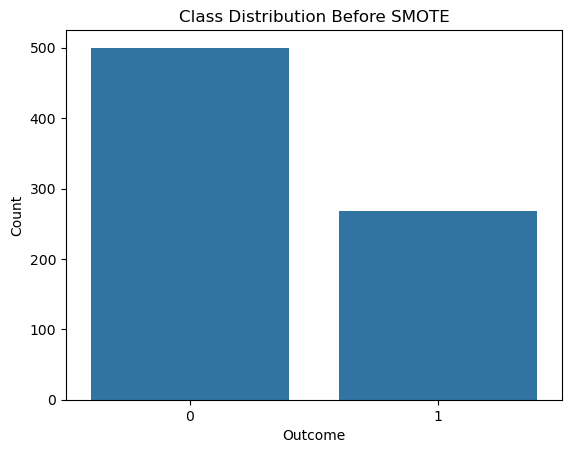

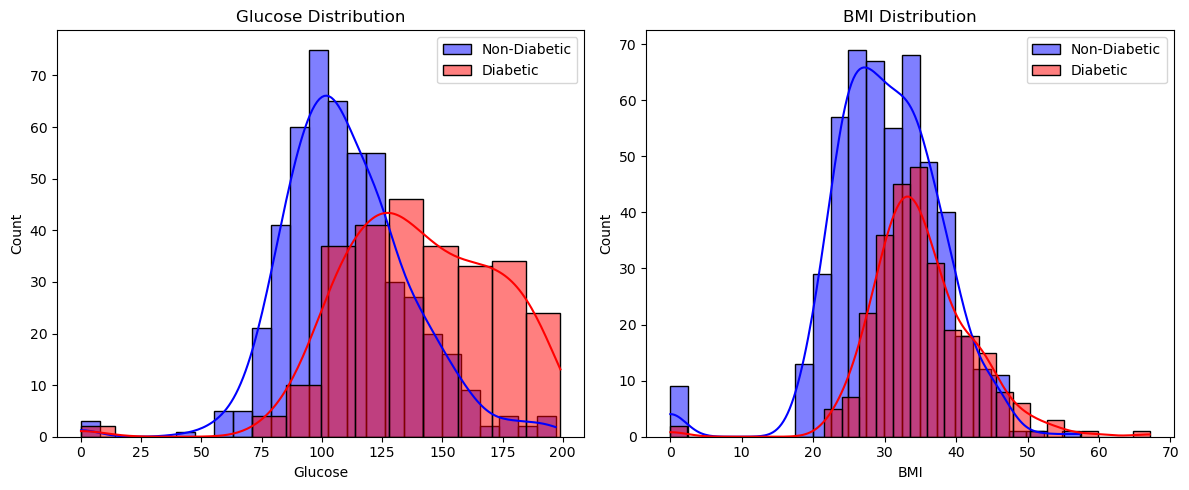

In [19]:
# Bar chart for class distribution
sns.countplot(x='Outcome', data=data) # plots the bar chart of the count of different values of the column x which is defined in data. 
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Histograms for Glucose and BMI
plt.figure(figsize=(12,5)) # set the size of the figure.

plt.subplot(1,2,1)
sns.histplot(data[data['Outcome']==0]['Glucose'], color='blue', label='Non-Diabetic', kde=True) # the glucose levels for the non-diabetic patients are plotted in a historic bar chart.
sns.histplot(data[data['Outcome']==1]['Glucose'], color='red', label='Diabetic', kde=True) # the glucose levels for the diabetic patients are plotted in a historic bar chart.
plt.title('Glucose Distribution')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(data[data['Outcome']==0]['BMI'], color='blue', label='Non-Diabetic', kde=True) #the BMI for the non-diabetic patients are plotted in a historic bar chart.
sns.histplot(data[data['Outcome']==1]['BMI'], color='red', label='Diabetic', kde=True) #the BMI for the diabetic patients are plotted in a historic bar chart
plt.title('BMI Distribution')
plt.legend()

plt.tight_layout()
plt.show()

By using the online documentation and printing the values of variables, explain in detail what this does:

`smote = SMOTE(random_state=42)`

`X_resampled, y_resampled = smote.fit_resample(X, y)`

Smote is an oversampling algorithm which works by these steps:
1. finding the minority classes
2. finding the nearest k neighbours in the sample space
3. syntetic sample- for each instance of the minority, synthetic sample is generated along the line of the k nearest neighbours such that it aligns with the minority class instance and the k nearest neighbours.
4. the oversampling is controlled by a oversampling ratio of the real values to the synthetically generated values.
5. perform these steps until completely balanced dataset is obtained.

In the above code, the smote is applied to the dataset X and the target variable y, the smote function will take care of the above steps so that it only returns a balanced dataset.

In [22]:
# separate features (X) and target (y)
X = data.drop('Outcome', axis=1) 
y = data['Outcome']

# display original class distribution
print("\nOriginal class distribution:")
print(y.value_counts())

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# display new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Original class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Class distribution after SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


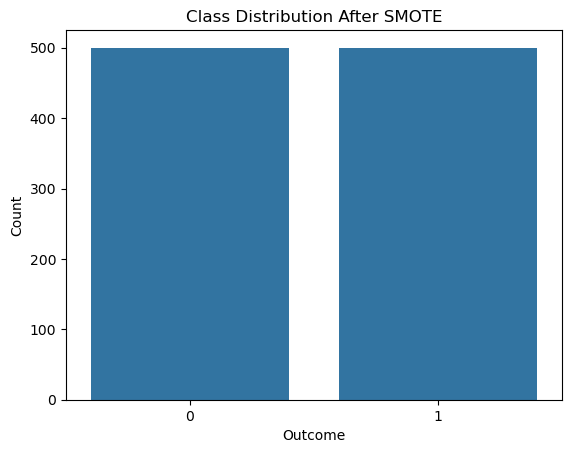

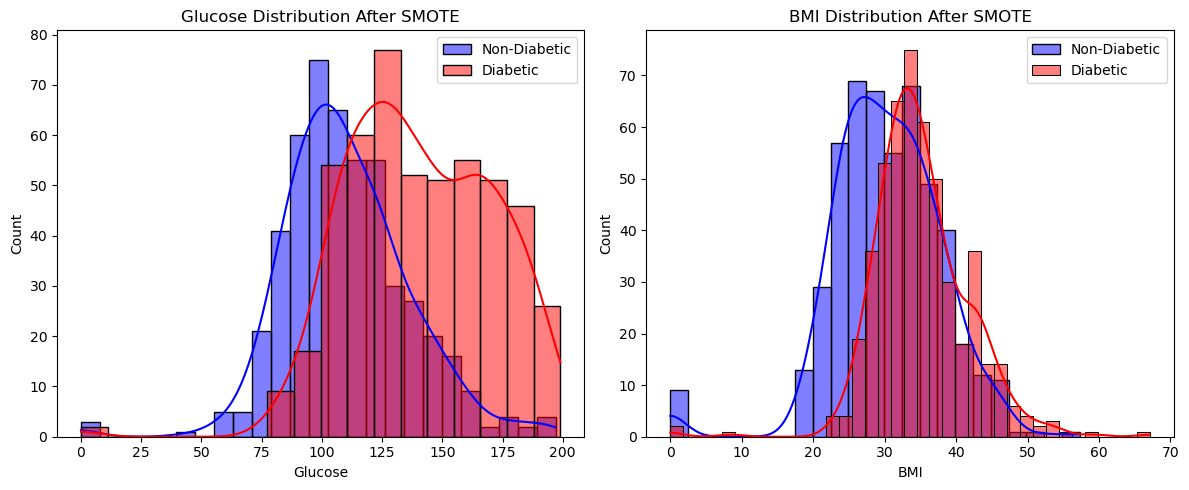

In [24]:
# Bar chart for class distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Optional: Histograms for Glucose and BMI after SMOTE
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Outcome'] = y_resampled

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(resampled_data[resampled_data['Outcome']==0]['Glucose'], color='blue', label='Non-Diabetic', kde=True ) # the glucose levels for the non-diabetic patients are plotted in a historic bar chart
sns.histplot(resampled_data[resampled_data['Outcome']==1]['Glucose'], color='red', label='Diabetic', kde=True) 
plt.title('Glucose Distribution After SMOTE')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(resampled_data[resampled_data['Outcome']==0]['BMI'], color='blue', label='Non-Diabetic', kde=True) # the BMI for the non-diabetic patients are plotted in a historic bar chart
sns.histplot(resampled_data[resampled_data['Outcome']==1]['BMI'], color='red', label='Diabetic', kde=True) # the BMI for the diabetic patients are plotted in a historic bar chart
plt.title('BMI Distribution After SMOTE')
plt.legend()

plt.tight_layout()
plt.show()

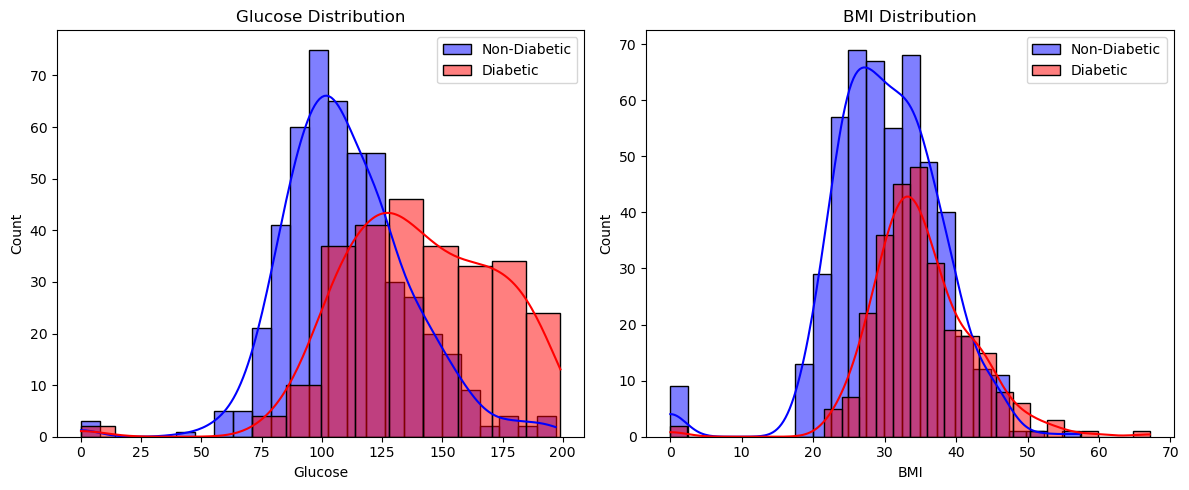

In [53]:
plt.figure(figsize=(12,5)) # set the size of the figure.

plt.subplot(1,2,1)
sns.histplot(data[data['Outcome']==0]['Glucose'], color='blue', label='Non-Diabetic', kde=True) # the glucose levels for the non-diabetic patients are plotted in a historic bar chart.
sns.histplot(data[data['Outcome']==1]['Glucose'], color='red', label='Diabetic', kde=True) # the glucose levels for the diabetic patients are plotted in a historic bar chart.
plt.title('Glucose Distribution')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(data[data['Outcome']==0]['BMI'], color='blue', label='Non-Diabetic', kde=True) #the BMI for the non-diabetic patients are plotted in a historic bar chart.
sns.histplot(data[data['Outcome']==1]['BMI'], color='red', label='Diabetic', kde=True) #the BMI for the diabetic patients are plotted in a historic bar chart
plt.title('BMI Distribution')
plt.legend()

plt.tight_layout()
plt.show()

Give a summary, in a markdown cell, of these visualizations and what SMOTE has done to the dataset. 

In the above graph, it is clear that the dataset has been balanced after performing smote algorithm on the dataset. Before the smote algorithm, the number of the non-diabetic were higher than the number of the diabetic patients. After smote, the count of both the samples were balanced by making the count increase of minority to that of majority. Hence, the model prediction works better. In the graphs also, we can see that the counts of the diabetic patients have increased to make it both more relative. There will be no bias towards non-diabetic data points by performing smote. 

____

![regression](https://miro.medium.com/v2/resize:fit:2000/1*N1-K-A43_98pYZ27fnupDA.jpeg)

## <font color=#18453B> Problem #3 Regression (10 pts) </font>

Read Chapter 5 of the textbook. Soon we will get to the mathematics of regression, so this is an important chapter. 

Summarize the chapter's main points in a markdown cell. 

* Regression Is one of the most important chapters in correlation. To calculate the fit of a line in a dataset, we calculate the error for each data point.
* The squared error is a measure of how far the point is from the line. The line we are looking for is the one with the smallest sum of squared errors. That is, we find (your computer knows how) the values of the slope and intercept that minimize the sum of squared errors. This process is called ordinary least squares (OLS) regression.
* Steps for OLS regression are:
    1. Calculate the mean X
    2. Calculate the slope. (Formula for covariance)
    3. Calculate the intercept
    4. Make predictions and check error.
* In a dataset, not all times, one perfect line fits all the curves. There should be different patterns in the dataset such that even the least mean squared error line through the dataset will produce a huge variation in the results because the shape of the dataset could be very varied.
* There are many ways to deal with non linearity. One way is to fit multiple data lines. another way is to fit in batches of data. Sometimes if there is no linearity, we can transform the variable into squared, cubed, or perform other expression on the data.Quadratic expressions can be used in such cases. Conditional mean is a good way of minimizing sum of mean squared error. 
* Problem of overfitting:
    * Problem of overfitting occurs when the model learns the noise, pattern of the dataset. They are also trained such that the performance of the model becomes very poor for unseen or new data.The model might perform extremely well on the historical data, predicting past election results with very high accuracy. The overfitted regression that gives us such accurate predictions is actually worse than a regression that uses no explanatory variables at all.



____

![missing](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)

## <font color=#18453B> Problem #4 Update on Your Project (10 pts) </font>

By now you should have decided on the main topic of your project and the data that is going to be used to inform it. (If not, do that now!)

For this HW, answer these questions:
1. clearly articulate the goal of your project (this goal might not be reached until the second half of the semester, of which half will be done by the midterm)
2. what are the datasets you plan to use?
3. describe the data: will you need to use, for example, encoding of any kind? 
4. what is your IDA strategy? 
5. list the detailed steps of your EDA strategy
6. are there imbalances in your dataset? how will you handle this? 
7. give a detailed account of your visualization plan, including why you made the choices you did 
8. all of this will end up in a Streamlit app: desribe your planned layout and logic behind it




### Goal and Dataset
* The topic for my project for this semester is to find how the government has been perfroming from 2020 to 2024, if there has been an increase in the food cost or there has been a decrease in the food cost.
* The dataset is a kaggle dataset and this is the link for that: https://www.kaggle.com/datasets/muhammadehsan0x2/us-stock-market-and-commodities-data-2020-2024. There were many wars that happened during the 2022 to 2024, there was a pandemic hit in the year 2020 and since the changes in the economy which was affected by many factors, we must consider the impact of the news into the stock market prediction for which I will be using a dataset of news from the Kaggle. https://www.kaggle.com/datasets/rmisra/news-category-dataset/data. I will integrate both the datasets to make stock market predictions. 
* The US stock and comodity dataset consists of numerical data. Date is a nomial data type. Encoding is not necessary because the data is numerical.
 ### For IDA:
* I will make get the mean, median and understand how statistical analysis
* Find the outliers and eliminate them. This I will try by z score method. 
* Check the distribution of all the variables, check for missing data, if for each variable the missing data is MNAR, MCAR or MAR.
* Identify trends and correlations in the dataset for key features like stock prices, commodity prices, volumes, etc.
* Duplicate records: Identify and remove any duplicate rows that may skew the analysis.
### for EDA:
* To deal with missingness, I want to use imputation and depending on the kind of missing data, will have to use MICE or other ways to impute data.
* Perform univariate analysis, bivatriate analysis. 
* Will have to perform PCA because there are multiple columns which might not result in effective prediction. 
* Find the correlation between the variables and find patterns in how the variables are dependent on each other.
* Work on time series analysis, the date column is given, so through the 4 years time, we can analyze the heights and lows of the dataset and analyst the reasons for each occurrence.
* Create a hypothesis test and prove it with the data analysis. 

### Imbalances:
* Normalization, min-abs scaling and max abs scaling.
* Standardization - Standardization is an essential step in analysing the data. Standardization involves the normalization of previously customized or disparate approaches to processes and technology.

### Visualization:
Trend Visualizations:
Line Plots: To display the time series of stock prices, commodity prices, and trading volumes. Line plots will highlight trends, fluctuations, and key events over time.
Moving Averages: Overlay moving averages (e.g., 50-day, 200-day) on stock prices to smooth fluctuations and reveal underlying trends.
* I will use plots from bokeh to make vivid charts and interrelated charts to make the visualization more lively and interactive.
* Kinds of visualization: will make graphs for each commodity along with the date. Can make graph of visualization of nasdaq vol, nasdaq price against date. 
* Bitcoin volume, bitcoin price against date.

* Candlestick charts show the opening, closing, high, and low prices of a stock in a specific time period. They’re useful for identifying patterns like bullish or bearish trends.
Tools: mplfinance or plotly for interactive candlestick charts.

____


![missing](https://miro.medium.com/v2/resize:fit:1400/1*ENvt_PTaH5v4BXZfd-3pMA.png)

## <font color=#18453B> Problem #5 More Practice with EDA (10 pts) </font>


In this HW problem you are going to explore how to use Seaborn to perform some basic EDA. Once you understand the logic of how Seaborn works, you can quickly make a wide range of visualizations very quickly to find interesting features in your data. Although the details will be different, understand the logic of Seaborn's API will suggest features to look for in other visualization libraries that are organized differently.

You will build within three contexts: `displot`, `kdeplot` and `jointplot`. A basic, default plot is given using the iris dataset. The workflow that Seaborn allows is that you begin your EDA within one of a simple plot and very quickly and easily perform a wide range of explorations from that starting point. 

Let's get started with `displot`. This choice is used for univariate dsitributions. Here is the basic code for iris in `displot`. Make sure you understand this code, and try some variations from other parts of the dataset.

Text(0.5, 1.0, 'Basic Distribution of Petal Length')

<Figure size 800x500 with 0 Axes>

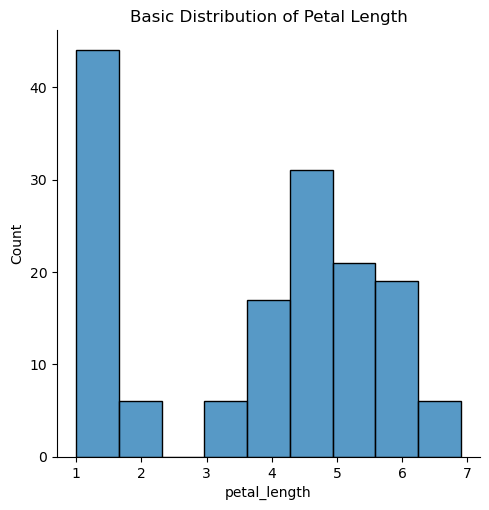

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

plt.figure(figsize=(8, 5))
sns.displot(data=iris, x="petal_length")
plt.title("Basic Distribution of Petal Length")

Next, by only modifying the `displot` we already in place, make these changes and comment on your observations:
* explore and vary the `kind=` option, including `kind=kde` and vary `fill=`
* you can vary the number of bins: vary `bins=`
* use `palette=` to vary the color scheme
* you can have a histogram _and_ a KDE: use bins= and `kde=True`
* the width of the kernel is called the bandwidth: vary widely `bw_adjust= `
* since this dataset has categories and Seaborn understands this, vary `hue=` with categorical column in the data
* we might want to break this apart: explore `col=`; is there a `row=`? 
* what does `multiple=` do? 
* add `rug=True`
* now, on your own, create various mixtures of these choices! [Read this](https://seaborn.pydata.org/generated/seaborn.displot.html) to see if there is anything I missed!

Hopefully you see the power of Seaborn: once you have a basic plot set up, it is easy to explore it in various ways with minimal changes to your code. 

Let's see if we can do the same with `kdeplot`....

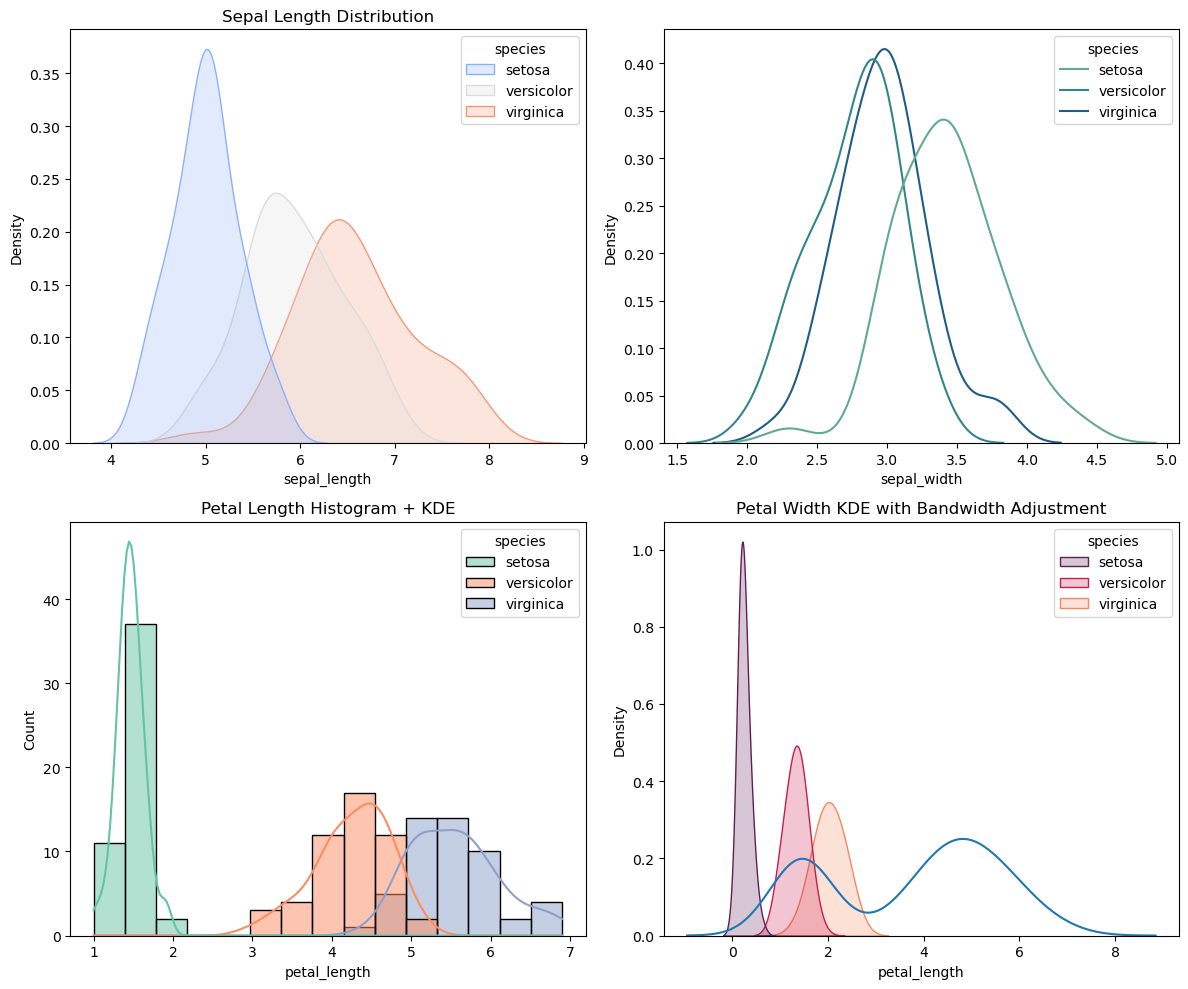

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a figure with subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# KDE plot for Sepal Length in the first subplot
sns.kdeplot(data=iris, x="sepal_length", hue="species", fill=True, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title('Sepal Length Distribution')

sns.kdeplot(data=iris, x="petal_length", fill=False, levels=5)
# KDE plot for Sepal Width in the second subplot, with rug plot
sns.kdeplot(data=iris, x="sepal_width", hue="species", ax=axes[0, 1], palette="crest")

# Histogram and KDE combined for Petal Length in the third subplot
sns.histplot(data=iris, x="petal_length", bins=15, kde=True, hue="species", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Petal Length Histogram + KDE')

# KDE with Bandwidth adjustment in the fourth subplot
sns.kdeplot(data=iris, x="petal_width", hue="species", fill=True, bw_adjust=2, ax=axes[1, 1], palette="rocket")
axes[1, 1].set_title('Petal Width KDE with Bandwidth Adjustment')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


Now that you’ve explored displot for univariate distributions, let’s move on to kdeplot. This function is useful for both 1D and 2D kernel density estimation (KDE), giving you more control over visualizing distributions.


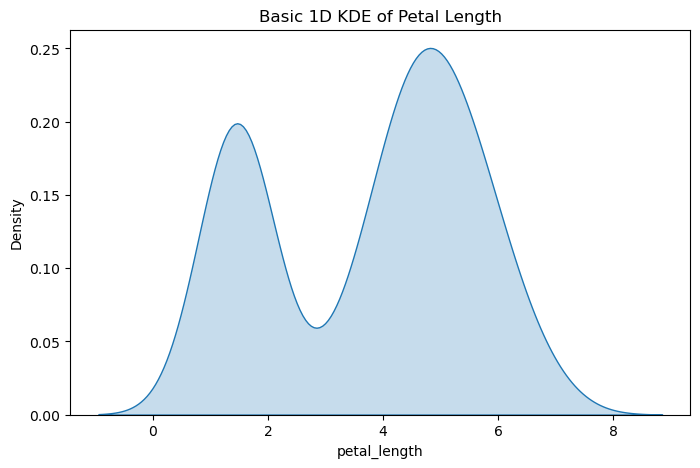

In [114]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=iris, x="petal_length", fill=True)
plt.title("Basic 1D KDE of Petal Length")
plt.show()

Vary:
* hue
* bw_adjust

What differences do you see between `displot` and `kdeplot` so far? 

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. The kind parameter selects the approach to use: histplot(), kdeplot(), ecdflpot(), kdfplot() is only a kernel density function works only towards the density estimiation, it only created a KDE plot. 

One of the advantages of `kdeplot` is that it can very easily switch to 2D. Notice how much coding was needed to make such a change. 

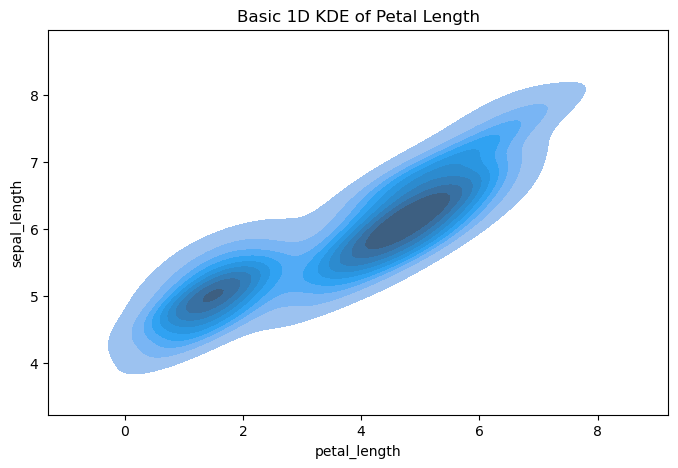

In [116]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=iris, x="petal_length",y='sepal_length', fill=True)
plt.title("Basic 1D KDE of Petal Length")
plt.show()

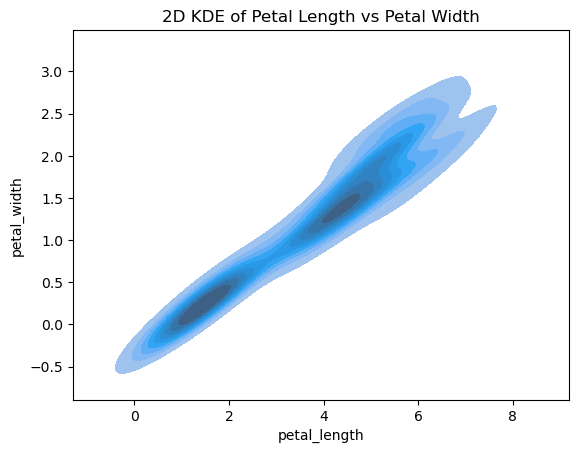

In [100]:
sns.kdeplot(data=iris, x="petal_length", y="petal_width", fill=True)
plt.title("2D KDE of Petal Length vs Petal Width")
plt.show()

In your own words, explain what this 2D KDE plot reveals to you. That is, how do you interpret this visualization and how would you explain to someone else? 

Next, make these changes:

* contour plots: Add contour lines by setting `fill=False` and `levels=5`. How does the representation change?
* color variations: Explore how different color palettes affect the KDE using the palette option.
* explore interactions with hue in 2D: Add `hue="species`" to the 2D KDE and observe the different species in the joint distribution.

Once you’ve completed these steps, experiment with different combinations to explore the KDE capabilities fully. Make a _very creative_ new variant. [Read this](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to see if there are great ideas I might have missed! 

ANS: A 2D KDE plot (Kernel Density Estimate plot) is a way to visualize the joint probability density of two continuous variables in two dimensions. It shows the areas where data points are more or less concentrated, allowing you to see patterns, clusters, and the distribution of the data in two variables. Essentially, it’s a smoothed version of a scatter plot, where the density is estimated using a kernel function.



Text(0.5, 1.0, "2D KDE of Petal Length vs Petal Width, hue='species'")

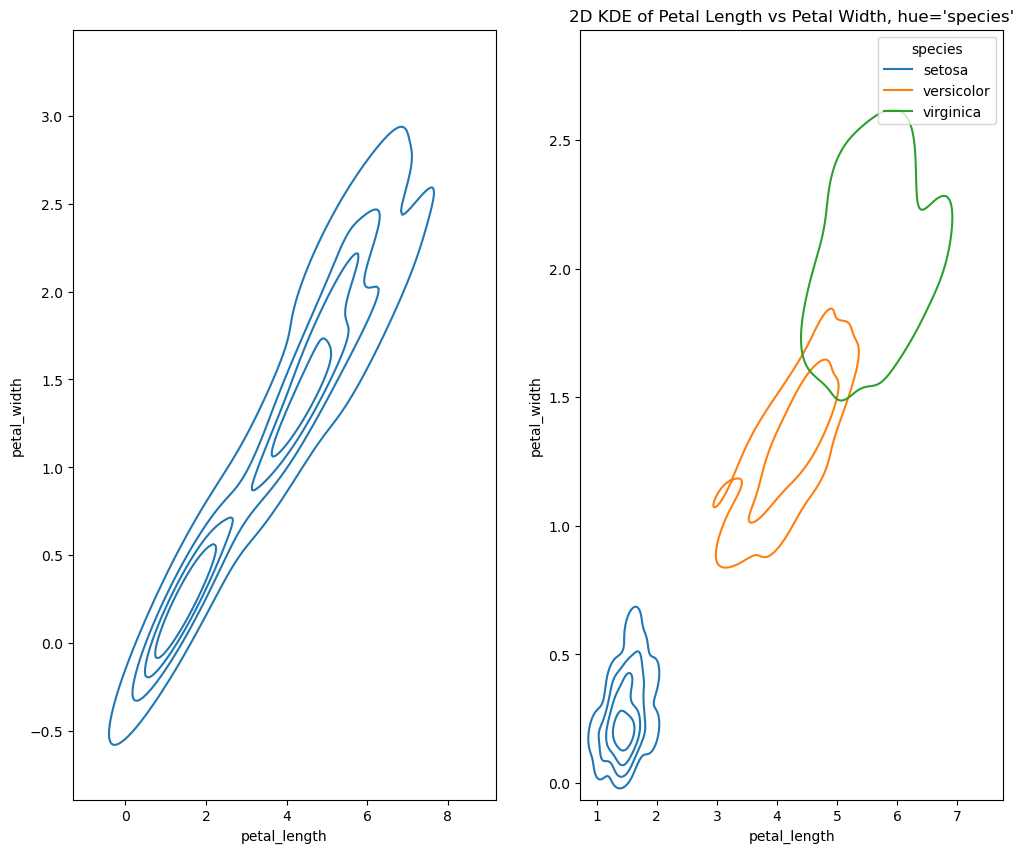

In [140]:
fig, axes=plt.subplots(1,2,figsize=(12, 10))
sns.kdeplot(data=iris, x="petal_length", y="petal_width", fill=False, levels=5,ax=axes[0])
plt.title("2D KDE of Petal Length vs Petal Width")

sns.kdeplot(data=iris, x="petal_length", y="petal_width", fill=False, hue='species',
            levels=5,ax=axes[1])
plt.title("2D KDE of Petal Length vs Petal Width, hue='species'")

By adding contour plots fill=False, the color shades were removed inside the contours. by setting the line count as 5, only 5 colors will be displayed. 

Finally, let’s turn to jointplot:

jointplot combines both joint and marginal distributions into a single figure, making it very useful for analyzing relationships between two variables while also seeing their individual distributions.

Here’s a basic jointplot of petal_length vs petal_width with a 2D KDE:

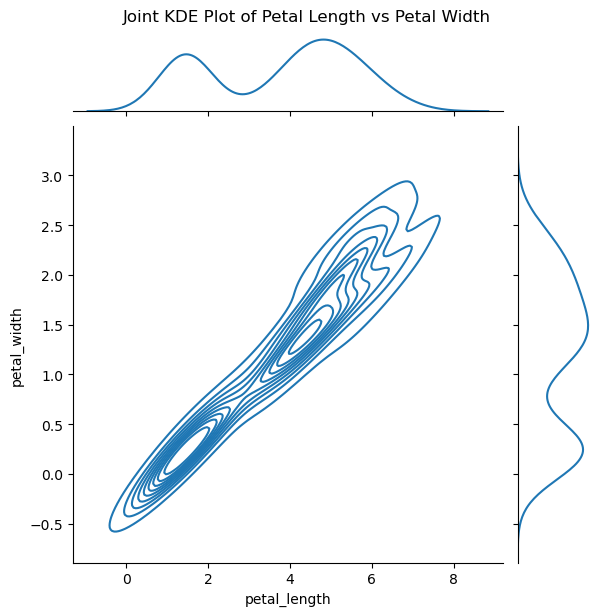

In [102]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="kde")
plt.suptitle("Joint KDE Plot of Petal Length vs Petal Width", y=1.02)
plt.show()

Describe what this plot is telling you. What new information does this reveal that `displot` and `kdeplot` didn't? 

* Basic Jointplot: Start with the provided code and ensure you understand how it combines the joint KDE with marginal distributions.
* Change the Plot Type: Try different kind options, such as `scatter` and `reg`. What insights do you gain from these?
* Using hue: Add `hue="species` to the jointplot. How does it change the analysis?
* Marginal Options: Customize the marginals using marginal_kws to switch between histograms and KDEs.
* Exploring Other Variables: Try using other features like `sepal_length` and `sepal_width`. What do you observe in the relationships?

Once you’ve completed the modifications, experiment with different combinations of these options to fully explore what jointplot can offer for EDA. [Read this](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to see if there is anything I missed!

* Joint KDE plot (Kernel Density Estimate) displays the bivariate distribution between petal_length and petal_width.
Contours: The contour lines represent areas of varying density. The areas with denser data points are represented by tighter and darker contours.
Marginal KDEs: On the top and right sides, you'll see the marginal distributions of petal_length and petal_width separately. These are individual 1D KDE plots showing the density of each variable on its own.
* The joint KDE reveals how petal length and width are distributed together.
Higher density regions indicate where most data points are concentrated. In this case, there’s a denser region where petal lengths are between 3 and 5 cm and petal widths between 1 and 2 cm.
This plot allows you to see if there's a relationship or pattern between the two variables—i.e., whether they increase together, which could suggest correlation or clustering.
* A displot generally shows the distribution of one variable using histograms or KDE. It doesn't give information about the relationship between two variables.
A kdeplot can show either a 1D distribution (one variable) or a 2D KDE for two variables, but without marginal distributions.
The jointplot adds marginal plots to help visualize the distributions of each variable separately alongside their joint distribution. This helps you understand how the two variables relate and what their individual distributions look like at the same time.

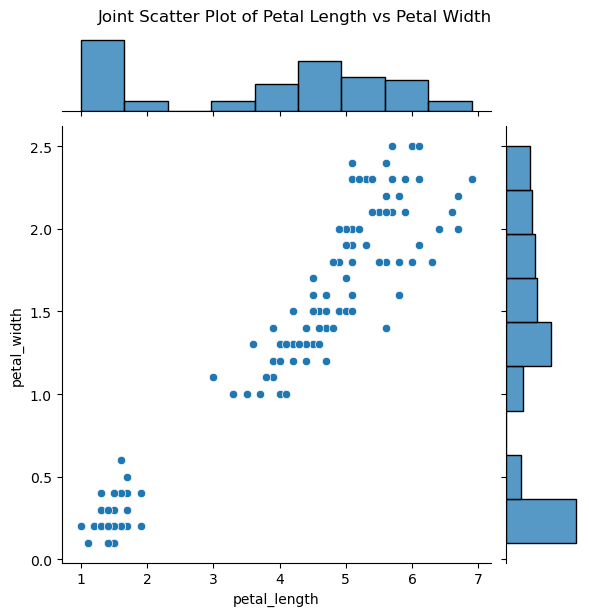

In [171]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="scatter")
plt.suptitle("Joint Scatter Plot of Petal Length vs Petal Width", y=1.02)
plt.show()

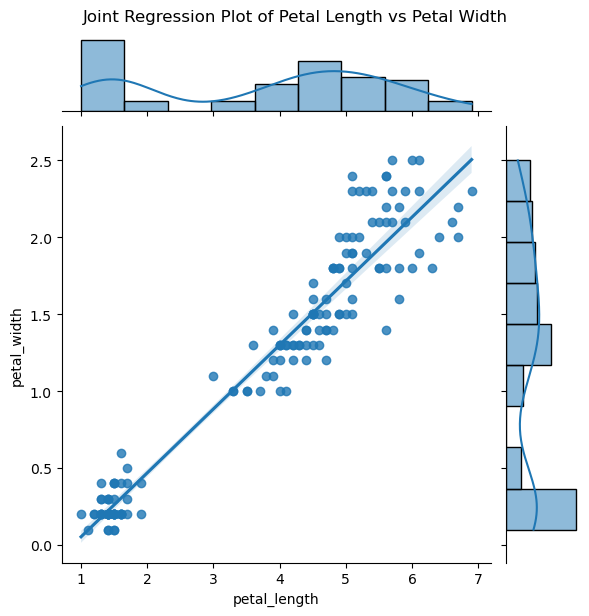

In [173]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="reg")
plt.suptitle("Joint Regression Plot of Petal Length vs Petal Width", y=1.02)
plt.show()

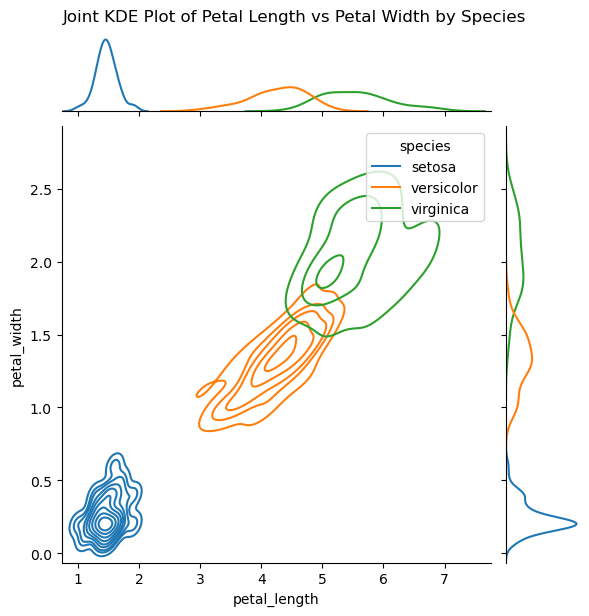

In [175]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", hue="species", kind="kde")
plt.suptitle("Joint KDE Plot of Petal Length vs Petal Width by Species", y=1.02)
plt.show()

* KDE Jointplot: Reveals density and correlation between two variables, with additional marginal distributions.
* Scatter/Reg Plot: Helps visualize individual data points and relationships (linear trends or correlation).
* Hue (for species): Allows the comparison of groups, showing how categories differ in joint distributions.
* Custom Marginals: Switching between histograms and KDEs can help highlight different aspects of marginal distributions.
* Other Variables: By exploring different variables, you can observe how relationships vary across features in your dataset.